<center><img width="460" height="300" src="https://upload.wikimedia.org/wikipedia/en/thumb/7/70/KAUST_Logo.svg/1200px-KAUST_Logo.svg.png"></center>
<h2><center>$$King~Abduallah~University~for~Science~and~Technology$$</center></h2>
<h2><center>$$\underline{\textbf{Course}}:~\color{Gold}{Geo-Environmental~Modeling}~\color{orange}{and}~\color{Turquoise}{Analysis}~(ErSE~316)$$</center></h2>
<h2><center>$$\underline{\textbf{Instructors:}}~\textbf{Hylke Beck} ~ \textbf{and} ~ \textbf{Yoshihide Wada} ~$$</center></h2>
<h2><center>$$\underline{\textbf{Student:}}~Sofien~Resifi$$</center></h2>
<h3><center>$$\underline{\textbf{Assignment~3}}$$</center></h3>

# Github link

"https://github.com/resifis/geo_env/blob/main/Assignment3/"

# Needed packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pdb
import xarray as xr
import tools
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

# Part 1: Downloading and Importing Jeddah Weather Data

$\Large \textbf{5. Load the Jeddah weather data into a Pandas }$
$\Large \textbf{dataframe using the read isd csv function}$
$\Large \textbf{from tools.py with the command:df\_isd = tools.read isd csv(path)}$

In [2]:
csv_path = "41024099999.csv"
df_isd = tools.read_isd_csv(csv_path)

In [3]:
df_isd

,TMP,DEW,WND
2024-01-01 00:00:00,21.7,13.0,1.5
2024-01-01 00:00:00,22.0,13.0,1.5
2024-01-01 01:00:00,21.0,13.0,NaN
2024-01-01 02:00:00,21.0,12.0,NaN
2024-01-01 03:00:00,20.7,11.0,NaN
...,...,...,...
2024-12-31 20:00:00,21.0,10.0,3.6
2024-12-31 21:00:00,20.8,9.0,3.6
2024-12-31 21:00:00,21.0,9.0,3.6
2024-12-31 22:00:00,20.0,9.0,3.1


$\Large \textbf{6.Use the following commands to visualize and get an overview}$
$\Large \textbf{of the ISD data for Jeddah:}$

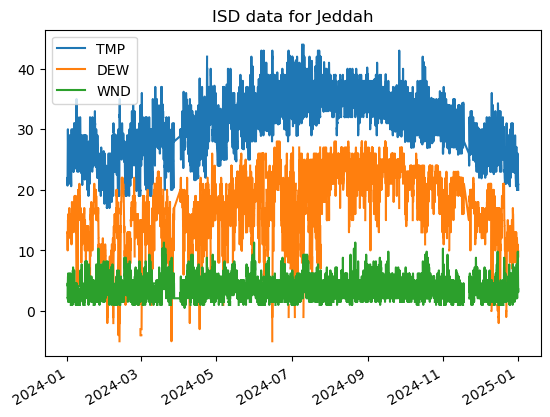

In [4]:
plot = df_isd.plot(title="ISD data for Jeddah")
plt.show()

# Part 2: Heat Index (HI) Calculation

$\Large \textbf{1-Convert dewpoint temperature (C) to relative humidity (\%)}$

In [5]:
#converting dewpoint temperature to relative humidity.
# Create a new column named RH to contain the relative humidity values.
df_isd['RH'] = tools.dewpoint_to_rh(df_isd['DEW'].values, df_isd['TMP'].values)

In [6]:
print("DataFrame columns = ",df_isd.columns)

DataFrame columns =  Index(['TMP', 'DEW', 'WND', 'RH'], dtype='object')


$\Large \textbf{2. Calculate the HI from air temperature and relative humidity}$

In [7]:
#compute the Heat index(HI) from air temperature and relative humidity
#add the Heat index as a new column.
df_isd['HI'] = tools.gen_heat_index(df_isd['TMP'].values, df_isd['RH'].values)

In [8]:
print("DataFrame columns = ",df_isd.columns)

DataFrame columns =  Index(['TMP', 'DEW', 'WND', 'RH', 'HI'], dtype='object')


$\Large \textbf{3. What is the highest HI observed in the year?}$
$\Large \textbf{Execute df isd.max() to obtain the maximum values for all columns, including the HI.}$

In [9]:
print("Maximum values for each of the columns")
print(df_isd.max())

Maximum values for each of the columns
TMP    44.000000
DEW    28.000000
WND    11.300000
RH     90.035695
HI     50.860819
dtype: float64


$\textbf{Answer:}$ The highest value of the HI during the year 2024 is $\textbf{HI = 50.86}$

$\Large \textbf{4. What is the day and time when the highest HI was observed?}$
$\Large \textbf{Use the command df\_isd.idxmax() to pinpoint the exact moment of the highest HI}$

In [10]:
print("time index corresponding to the maximum values for each of the columns")
print(df_isd.idxmax())

time index corresponding to the maximum values for each of the columns
TMP   2024-07-09 10:00:00
DEW   2024-06-19 01:00:00
WND   2024-03-19 09:00:00
RH    2024-09-28 03:00:00
HI    2024-08-10 11:00:00
dtype: datetime64[ns]


$\textbf{Answer:}$ The highest value of the $\textbf{HI}$ during the year 2024 occured on $\textbf{2024-08-10 at 11:00:00 (UTC)}$

$\Large \textbf{5. The ISD is a global dataset and time is expressed in Universal Coordinated}$
$\Large \textbf{Time (UTC).
What is the local time of the highest HI?}$

$\textbf{Answer:}$ The local time is a three hours ahead of the UTC time, therefore, the highest value of the $\textbf{HI}$ during the year 2024 occured on $\textbf{2024-08-10 at 14:00:00 (Local time)}$

$\Large \textbf{6 What air temperature and relative humidity were observed at this moment?}$

In [11]:
#Read the column values corresponding to the time where we observed the maximum values of HI
df_isd.loc[["2024-08-10 11:00:00"]]

,TMP,DEW,WND,RH,HI
2024-08-10 11:00:00,38.0,27.0,6.7,53.7797,50.860819


$\textbf{Answer:}$ At the moment of the maximum observed $\textbf{HI}$, the air temperature and relative humidity have the values of 38 $C^\circ$ and 53.77 %, respectively.

$\Large \textbf{7. Based on the National Weather Service’s HI categories}$
$\Large \textbf{,what physical effects on the body might be expected at this HI level?}$

$\textbf{Answer:}$ We have a heat index of 50.86 $C^\circ$. We first need to convert the Heat index to $^\circ F$. In Farenheit the heat index is 123.548 $^\circ F$. From the web site the heat index level is classified as $\color{red}{\textbf{Danger}}$ with harmful effects on the human body as follows: $\textbf{"Heat cramps or heat exhaustion likely, and heat stroke possible with prolonged exposure and/or physical activity."}$

$\Large \textbf{8. Can this event of high temperature and humidity be called a heatwave?}$

In [12]:
# Extract the summer period for the whole year data
df_isd['time'] = df_isd.index
df_isd["time"] = pd.to_datetime(df_isd['time'])
df_isd['month'] = df_isd['time'].dt.month
df_isd_summer = df_isd[df_isd['month'].isin([6, 7, 8])]
df_isd.drop(["month","time"],axis = 1,inplace = True)
df_isd_summer.drop(["month","time"],axis = 1,inplace = True)

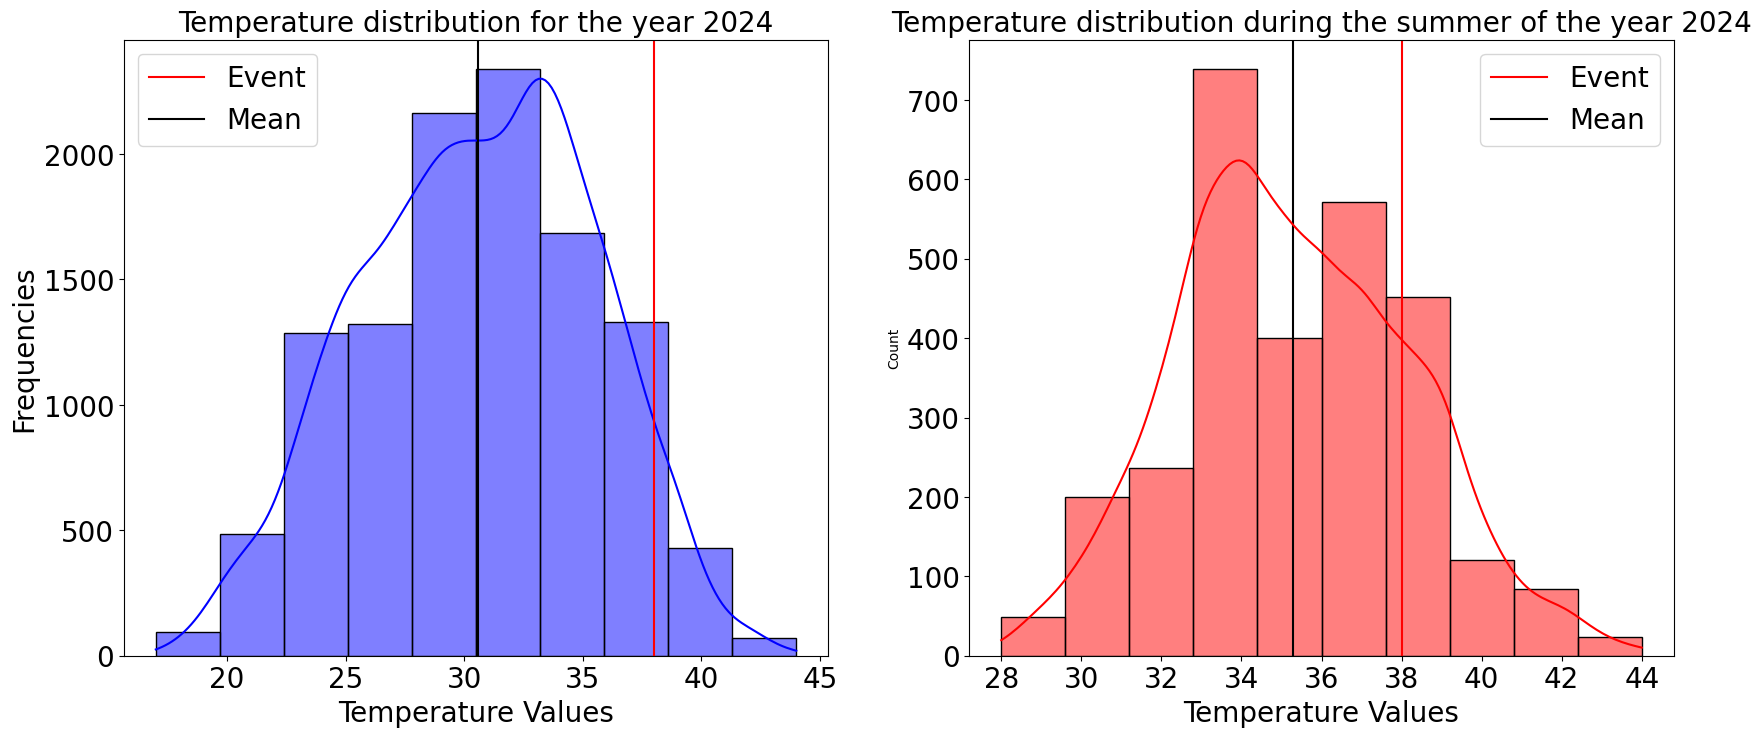

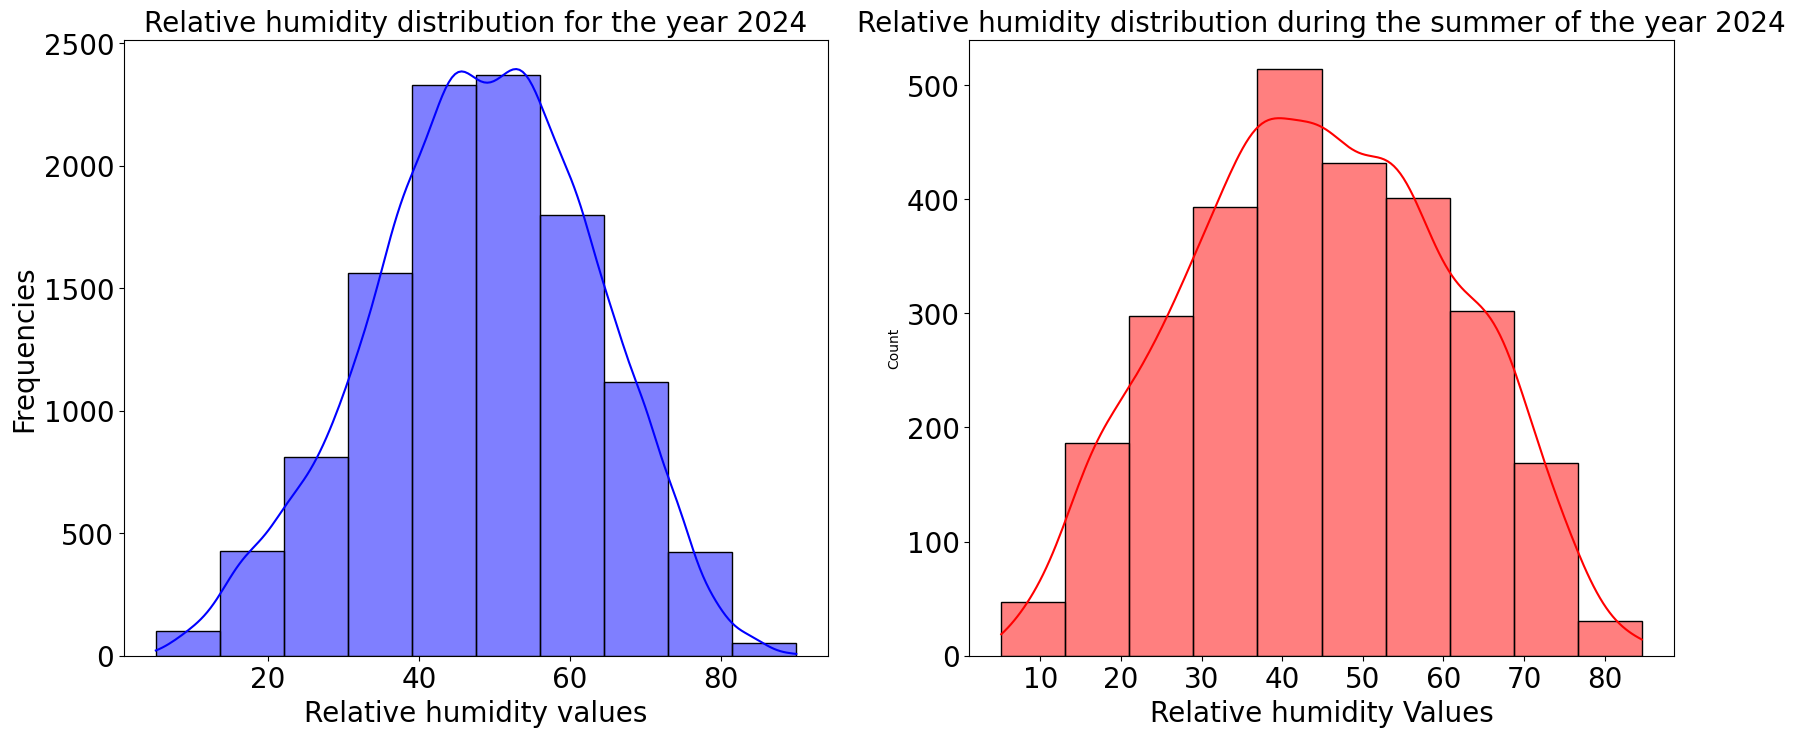

In [13]:
plt.figure(figsize = (20,8))
plt.subplot(121)
plt.title("Temperature distribution for the year 2024",fontsize = 20)
#_ = plt.hist(df_isd["TMP"].values,bins = 10)
sns.histplot(df_isd["TMP"].values, kde=True, bins=10, color='blue')
plt.axvline(x = 38, color = 'red',label = "Event")
plt.axvline(x = 30.59, color = 'black',label = "Mean")
plt.xlabel("Temperature Values",fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 20)
plt.ylabel("Frequencies",fontsize = 20)
plt.subplot(122)
plt.title("Temperature distribution during the summer of the year 2024",fontsize = 20)
plt.axvline(x = 38, color = 'red',label = "Event")
plt.axvline(x = 35.28, color = 'black',label = "Mean")
sns.histplot(df_isd_summer["TMP"].values, kde=True, bins=10, color='red')
plt.xlabel("Temperature Values",fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 20)
plt.show()


plt.figure(figsize = (20,8))
plt.subplot(121)
plt.title("Relative humidity distribution for the year 2024",fontsize = 20)
#_ = plt.hist(df_isd["TMP"].values,bins = 10)
sns.histplot(df_isd["RH"].values, kde=True, bins=10, color='blue')
plt.xlabel("Relative humidity values",fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.ylabel("Frequencies",fontsize = 20)
plt.subplot(122)
plt.title("Relative humidity distribution during the summer of the year 2024",fontsize = 20)
sns.histplot(df_isd_summer["RH"].values, kde=True, bins=10, color='red')
plt.xlabel("Relative humidity Values",fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()


In [14]:
print("Mean air temperature during the year 2024 = ",df_isd["TMP"].mean())
print("Mean air temperature during the summer of 2024 = ",df_isd_summer["TMP"].mean())
print("Mean Relative Humidity during the year 2024 = ",df_isd["RH"].mean())
print("Mean Relative Humidity during the summer of 2024 = ",df_isd_summer["RH"].mean())

Mean air temperature during the year 2024 =  30.596521584017122
Mean air temperature during the summer of 2024 =  35.28873043478261
Mean Relative Humidity during the year 2024 =  48.291386861790805
Mean Relative Humidity during the summer of 2024 =  44.47286903952729


$\textbf{Answer:}$ 

$\textbf{Event characteristics:}$ air temperature of 38$^\circ C$ and relative humidity of 53.7797 %

To classify if this event is heat wave we have to consider multiple factors: First we need to take into account that the measurmenet station is in $\textbf{Jeddah}$. Second we need to look at how the values of the temperature and relative humidity are positioned compared to their distribution within the year of 2024 and specifically within the summer period. Finally, we need to take into account the definition of a heat wave from the world meteorological organization (WMO).

Based on the definition of a heat wave by WMO which says that a heat wave is a period (few days) where we have an excess heat values. we can say that this event is a usual event in Jeddah during the summer period. The plots above show the distribution of air temperature and relative humidity during the year of 2024 and during the summer of 2024.

Looking at the temperature distribution during summer we can see that the value of 38$^\circ C$ is not in the $\textbf{tail}$ of the distribution, which indicates that this values is not an $\textbf{extreme}$ values during the summer. The same interpretation works for relative humidity. Here we can conclude that the this event is $\textbf{not a heat wave during the summer}$ (it is a usual event).

Now if we compare this event to whole year. An air temperature value of 38$^\circ C$ is closer to the tail of distribution than the mean values (30.5$^\circ C$ ) during the year of 2024 (Look at top left figure). The day of the even can be considered as a $\textbf{heat wave}$ if compared to the temperature distribution during the whole year.

$\Large \textbf{9. Is it possible to calculate the HI using daily weather data instead of hourly data?}$
$\Large \textbf{The pandas dataframe method resample could be used for this purpose.}$

Yes, technically it is possible to compute the HI using daily weather data instead of hourly. Yet, computing the daily HI index may lead to a loss of information. Specifically, if we have a hight HI values that persist during few hours of the day, by averaging we are going to lose that information. Which mean that averaging will $\textbf{shadow}$ the extreme values.

Below we can see that the maximum Heat index after resampling is 44.5 $^\circ C$, while in the hourly dataset the maximum Heat index is 50.86$^\circ C$.

In [15]:
df_isd_daily = df_isd.resample('D').mean()
print("maximum values before resampling")
print(df_isd.max())
print("maximum values after resampling")
print(df_isd_daily.max())

maximum values before resampling
TMP    44.000000
DEW    28.000000
WND    11.300000
RH     90.035695
HI     50.860819
dtype: float64
maximum values after resampling
TMP    37.862500
DEW    25.666667
WND     8.121875
RH     71.025666
HI     44.592394
dtype: float64


$\Large \textbf{10. Produce a figure of the HI time series for the year as explained in the previous}$
$\Large \textbf{assignment using the plt.savefig function.}$

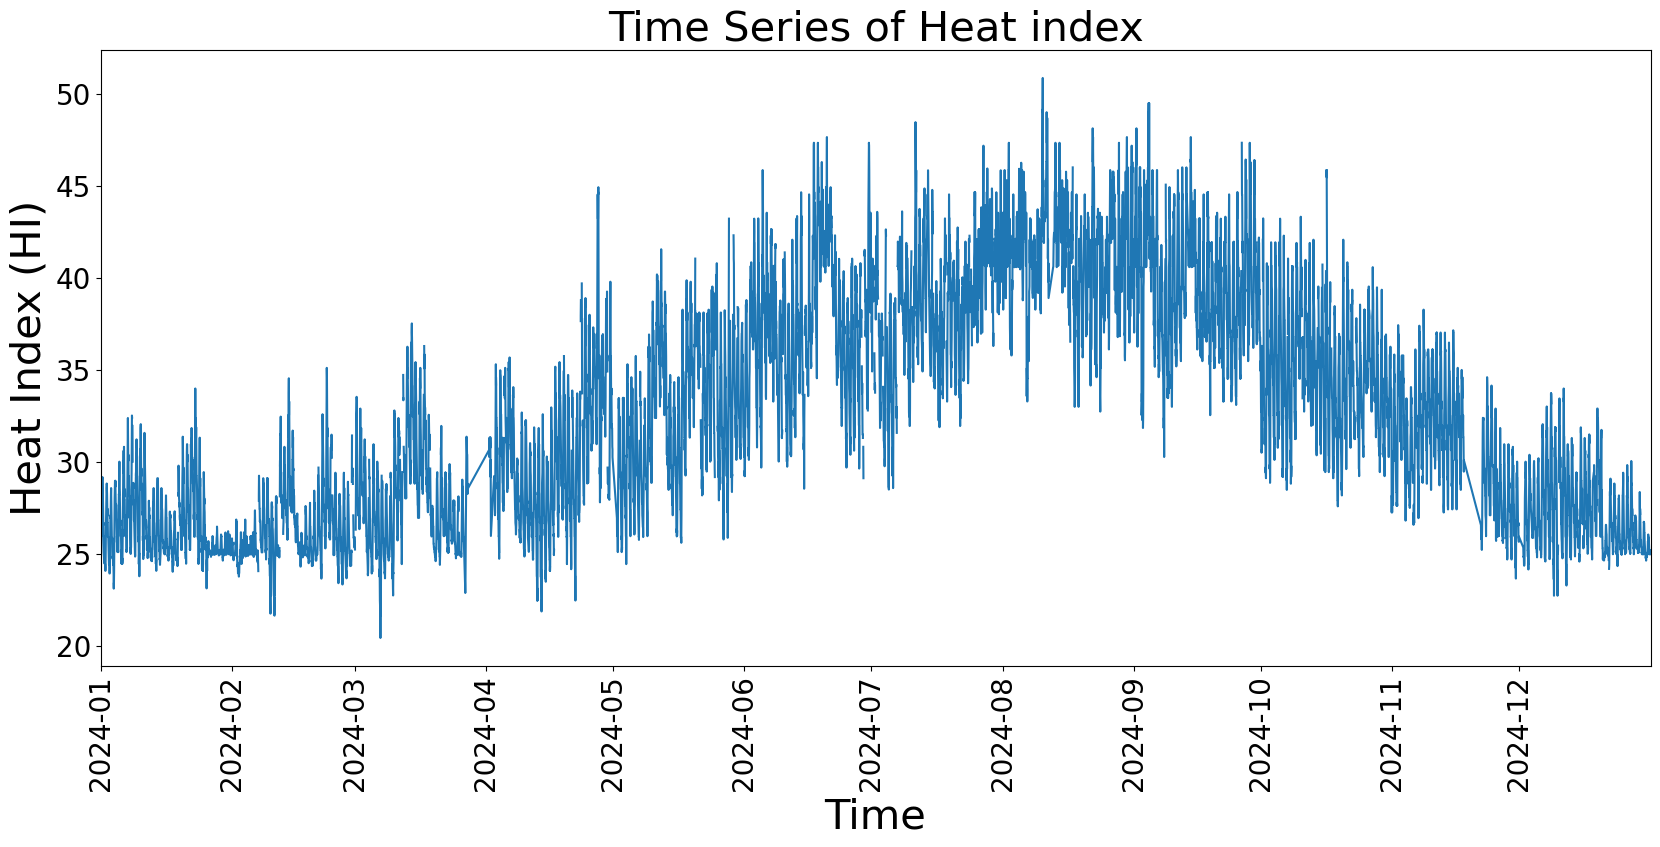

In [16]:
plt.figure(figsize = (20,8))
plt.title("Time Series of Heat index",fontsize = 30)
plt.plot(df_isd.index,df_isd["HI"].values)
plt.xlabel("Time",fontsize = 30)
plt.xticks(fontsize = 20,rotation  = 90)
plt.ylabel("Heat Index (HI)",fontsize = 30)
plt.xlim([df_isd.index[0],df_isd.index[-1]])
plt.yticks(fontsize = 20)
plt.savefig("HI_timeseries.png",dpi = 300)
plt.show()

$\textbf{Description:}$ In the figure above we can notice that there is a general trend, where the Heat index values are higher during the summer period compared to other seasons of the year 2024.

# Part 3: Potential Impact of Climate Change

$\Large \textbf{1- What is the projected increase in air temperature for Jeddah, under ‘middle-of-the-road’}$
$\Large \textbf{scenario SSP2-4.5, according to the simulation you have analyzed in assignment 2?}$

$\textbf{Answer:}$ Based on homework2, the average increase of temperature for scenario SSP2-4.5 is around $\textbf{2.5}$ $^\circ C$.

$\Large \textbf{2- To assess the potential impact of climate change on hot spells in Jeddah,}$
$\Large \textbf{apply this projected warming to the air temperature data and recalculate the HI.}$
$\Large \textbf{What is the increase in the highest HI value when this additional warming is considered?}$

In [17]:
# apply projected warmning to the air temperature
df_isd["Proj_TMP"] = df_isd["TMP"] + 2.5
# compute relative humidity assuming the dew point temperature is the same
df_isd["Proj_RH"] = tools.dewpoint_to_rh(df_isd['DEW'].values, df_isd['Proj_TMP'].values)
# compute the heat index
df_isd['Proj_HI'] = tools.gen_heat_index(df_isd['Proj_TMP'].values, df_isd['Proj_RH'].values)

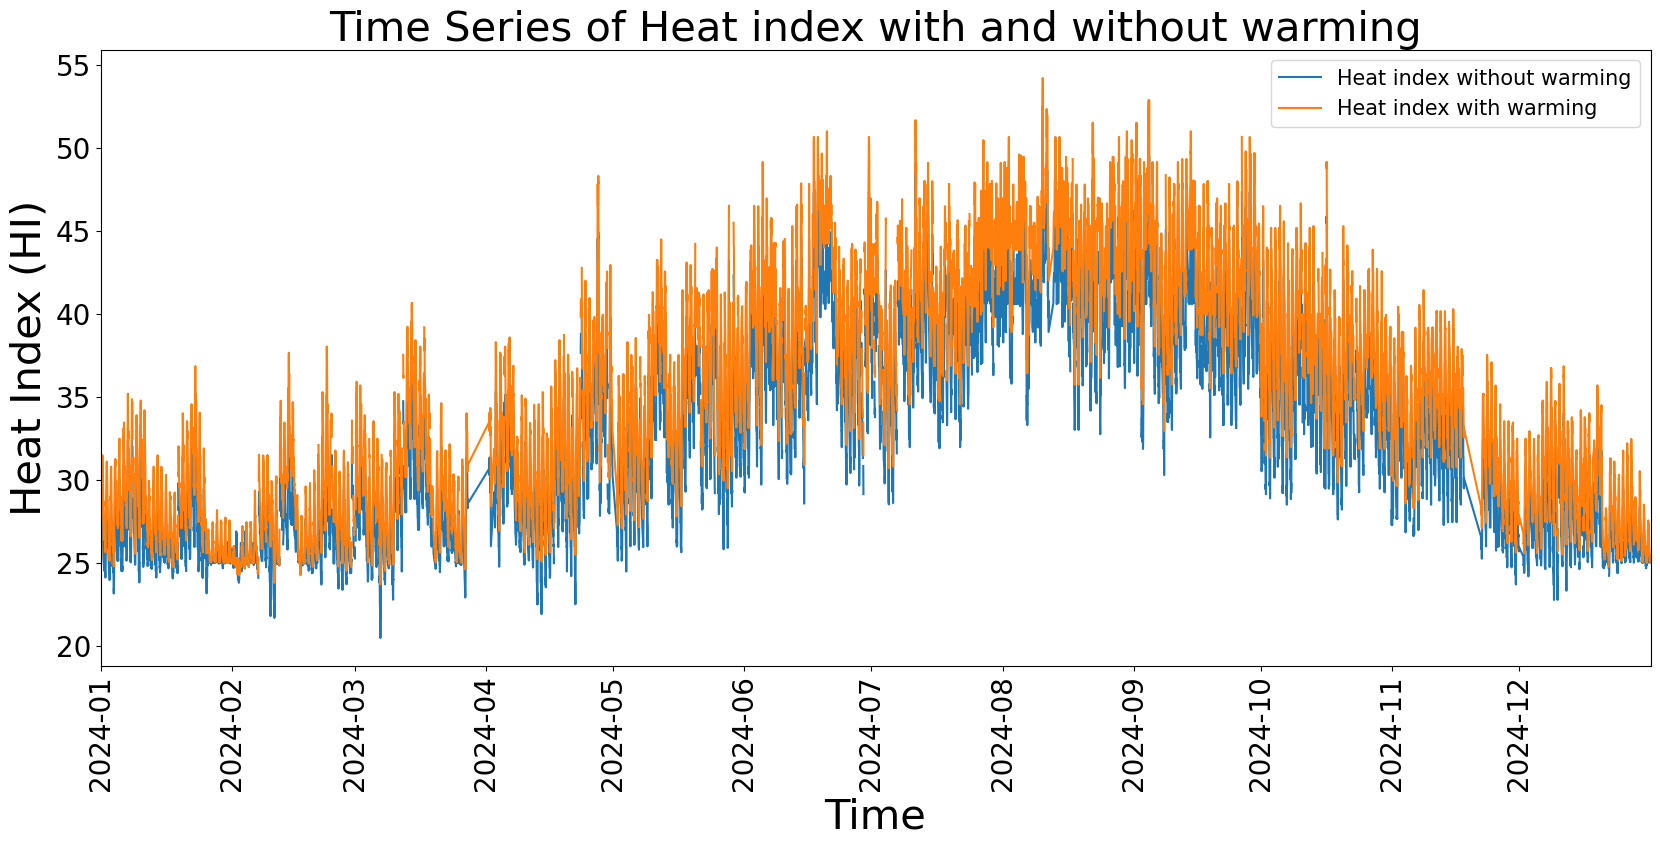

In [18]:
plt.figure(figsize = (20,8))
plt.title("Time Series of Heat index with and without warming",fontsize = 30)
plt.plot(df_isd.index,df_isd["HI"].values, label = "Heat index without warming")
plt.plot(df_isd.index,df_isd["Proj_HI"].values,label = "Heat index with warming")
plt.xlabel("Time",fontsize = 30)
plt.xticks(fontsize = 20,rotation  = 90)
plt.ylabel("Heat Index (HI)",fontsize = 30)
plt.xlim([df_isd.index[0],df_isd.index[-1]])
plt.yticks(fontsize = 20)
plt.legend(fontsize = 15)
plt.savefig("HI_timeseries_warming.png",dpi = 300)
plt.show()

In [19]:
print("Average heat index without warming = ", df_isd["HI"].mean())
print("Average heat index with warming = ", df_isd["Proj_HI"].mean())

print("Maximum heat index without warming = ", df_isd["HI"].max())
print("Maximum heat index with warming = ", df_isd["Proj_HI"].max())


Average heat index without warming =  32.90256642420158
Average heat index with warming =  35.469176999951884
Maximum heat index without warming =  50.86081856350505
Maximum heat index with warming =  54.234647986605836


$\textbf{Answer:}$ On average during the year 2024, if we increase the air temperature by 2.5 $^\circ$ the Heat index increases by 2.56 $^\circ$. While for the maximum value, the heat index increased by around 4 $^\circ$ after warming.